[2024-11-01 Fiddler](https://thefiddler.substack.com/p/whats-the-area-of-a-pseudo-square)
====================

Fiddler
-------
Since all the angles are 90°, the arcs share a center of curvature and their angles add up
to 360°.  Let $r$ and $r+1$ be their radii of curvature, and let $\theta$ and $2\pi-\theta$ be 
their angles.  Let $\theta < \pi$, so the area is

In [1]:
A(r,theta) = pi*r^2*(1 - theta/(2*pi)) + pi*(r+1)^2*theta/(2*pi)
show(A)

(r, theta) |--> -1/2*pi*r^2*(theta/pi - 2) + 1/2*(r + 1)^2*theta

Since the arc lengths are both 1,

In [2]:
solutions = solve([(r+1)*theta == 1, r*(2*pi-theta) == 1], [r, theta])
show(solutions)

[[r == -1/2*(pi - sqrt(pi^2 + 1) - 1)/pi, theta == pi - sqrt(pi^2 + 1) + 1], [r == -1/2*(pi + sqrt(pi^2 + 1) - 1)/pi, theta == pi + sqrt(pi^2 + 1) + 1]]

The first solution has $0 < r < 1$ and $0 < \theta < \pi$, while the second solution has
$r < 0$ and $\theta > 2\pi$, so the area is

In [3]:
r_s = solutions[0][0].rhs()
theta_s = solutions[0][1].rhs()
area = A(r_s, theta_s).simplify_full()
show((area,numerical_approx(area)))

(1/2*(sqrt(pi^2 + 1) + 1)/pi, 0.683874197465684)

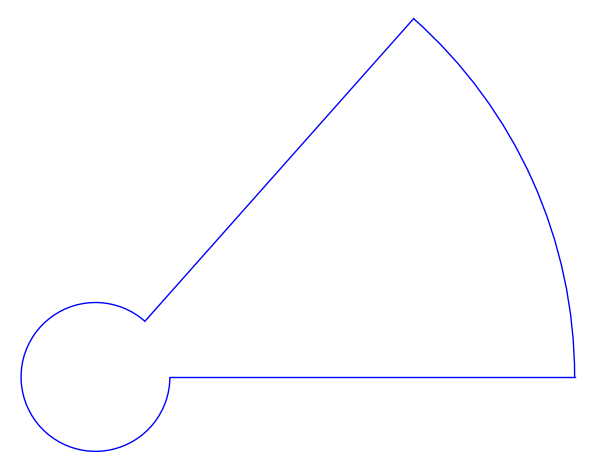

In [4]:
(arc((0,0),r_s,angle=0,sector=(theta_s,2*pi),axes=false)
 + arc((0,0),1+r_s,angle=0,sector=(0,theta_s))
 + line([(r_s,0),(1+r_s,0)])
 + line([(r_s*cos(theta_s),r_s*sin(theta_s)),((1+r_s)*cos(theta_s),(1+r_s)*sin(theta_s))]))

Extra credit
------------
Let the straight side be horizontal, with ends at $(0,0)$ and $(1,0)$.

Let the corner on the left side, $(0,0)$, turn up, connecting to an arc with radius of curvature
$r_L$, which can be either positive or negative, so its center of curvature is at $(r_L,0)$, where
$|r_L| > 1/2\pi$.

The corner on the right side, $(1,0)$, can turn up or turn down, connecting to an arc with radius of curvature
$r_R$, which can be either positive or negative, so its center of curvature is at $(1+r_R,0)$, where
$|r_R| > 1/2\pi$.

Then, $r_L$ defines the location of the third corner, as well as a line on which the center of curvature of
the fourth side must lie.

Similarly, $r_R$ and whether the right corner turns up or down, defines the location of the fourth corner,
as well as a line on which the center of curvature of the fourth side must lie.

The two lines then define the point for the center of curvature of the fourth side.  If that point is not
equidistant from the third and fourth corners, a pseudo-square is not possible.

If there is a fourth side, a pseudo-quadrilateral is defined.  If the length of the fourth side is 1, then
it's a pseudo-square.

The third corner is at $(r_L(1-\cos(1/r_L)),r_L\sin(1/r_L))$, so the
center of curvature of the fourth side lies on
$y-r_L\sin(1/r_L) = (x-r_L(1-\cos(1/r_L))/\tan(1/r_L))$.

When the corner at $(1,0)$ turns up, the fourth corner is at
$(1+r_R(1-\cos(1/r_R),r_R\sin(1/r_R))$, so the center of curvature of
the fourth side lies on $y-r_R\sin(1/r_R) = (x-(1+r_R(1-\cos(1/r_R)))/\tan(1/r_R)$.

When the corner at $(1,0)$ turns down, the fourth corner is at
$(1+r_R(1-\cos(1/r_R),-r_R\sin(1/r_R))$, so the center of curvature of
the fourth side lies on $y+r_R\sin(1/r_R) = -(x-(1+r_R(1-\cos(1/r_R)))/\tan(1/r_R)$.

It seems like there could be many possibilities.  Graphically exploring:

In [5]:
def t(rL, rR, up):
    xmin = min(0,rL*(1-cos(1/rL)),1+rR*(1-cos(1/rR)))
    xmax = max(1,rL*(1-cos(1/rL)),1+rR*(1-cos(1/rR)))
    p = line([(0,0),(1,0)])
    if rL >= 0:
        p += arc((rL,0),abs(rL),angle=pi,sector=(2*pi-abs(1/rL),2*pi))
    else:
        p += arc((rL,0),abs(rL),angle=0,sector=(0,abs(1/rL)))
    x_3 = rL*(1-cos(1/rL))
    y_3 = rL*sin(1/rL)
    p += circle((x_3,y_3),0.01)
    if up and rR >= 0:
        p += arc((1+rR,0),abs(rR),angle=pi,sector=(2*pi-abs(1/rR),2*pi))
    elif up:
        p += arc((1+rR,0),abs(rR),angle=0,sector=(0,abs(1/rR)))
    elif rR >= 0:
        p += arc((1+rR,0),abs(rR),angle=pi,sector=(0,abs(1/rR)))
    else:
        p += arc((1+rR,0),abs(rR),angle=0,sector=(2*pi-abs(1/rR),2*pi))
    x_4 = 1+rR*(1-cos(1/rR))
    y_4 = rR*sin(1/rR)
    slope = 1/tan(1/rR)
    if not up:
        y_4 = -y_4
        slope = -slope
    p += circle((x_4,y_4),0.01)
    intersect = solve(y_3+(x-x_3)/tan(1/rL) == y_4+(x-x_4)*slope,x)
    x_i = intersect[0].rhs()
    y_i = rL*sin(1/rL)+(x_i-rL*(1-cos(1/rL)))/tan(1/rL)
    p += circle((x_i,y_i),0.01)
    xmin = min(0,x_3,x_4,x_i)
    xmax = max(1,x_3,x_4,x_i)
    p += plot(y_3 + (x-x_3)/tan(1/rL), x, xmin, xmax, linestyle='dashed')
    p += plot(y_4 + slope*(x-x_4), x, xmin, xmax, linestyle='dashed')

    r_3 = sqrt((x_i-x_3)^2 + (y_i-y_3)^2)
    r_4 = sqrt((x_i-x_4)^2 + (y_i-y_4)^2)
    p += circle((x_i,y_i),r_3,color='red')
    p += circle((x_i,y_i),r_4,color='green')
    theta_3 = atan2(y_i-y_3,x_i-x_3)
    theta_4 = atan2(y_i-y_4,x_i-x_4)
    print(f"radius={(numerical_approx(r_3),numerical_approx(r_4))}")
    print(f"circumference={(numerical_approx(2*pi*r_3),numerical_approx(2*pi*r_4))}")
    print(f"theta_3={numerical_approx(theta_3)},theta_4={numerical_approx(theta_4)}")
    print(numerical_approx(r_3*abs(theta_4-theta_3)))
    print(numerical_approx(r_3*(2*pi-abs(theta_4-theta_3))))
    print(numerical_approx(r_4*abs(theta_4-theta_3)))
    print(numerical_approx(r_4*(2*pi-abs(theta_4-theta_3))))
    return p

This looks like it could be close to a pseudo-square with one straight side, and the fourth
side would probably be concave.

radius=(0.319286939131103, 0.378460086830644)
circumference=(2.00613900472289, 2.37793485692821)
theta_3=-0.352280596282026,theta_4=2.68452282214127
0.969611668211244
1.03652733651164
1.14930888542408
1.22862597150413


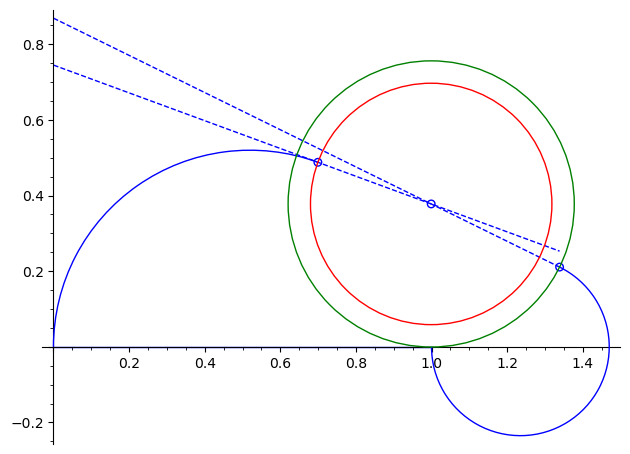

In [6]:
t(0.520,0.235,false)

Based on the exploration, I'll first consider the right corner turning down.

Given $r_L$, the location of the third corner is

In [7]:
x3(r_L) = r_L*(1-cos(1/r_L))
y3(r_L) = r_L*sin(1/r_L)

The center of curvature of the fourth side must be on the line

In [8]:
l3(x,r_L) = y3(r_L) + (x-x3(r_L))/tan(1/r_L)

Given $r_R$, the location of the fourth corner is

In [9]:
x4(r_R) = 1 + r_R*(1-cos(1/r_R))
y4(r_R) = -r_R*sin(1/r_R)

The center of curvature of the fourth side must be on the line

In [10]:
l4(x,r_R) = y4(r_R) - (x-x4(r_R))/tan(1/r_R)

The location of the center of curvature of the fourth side must then be

In [11]:
xc(r_L,r_R) = solve(l3(x,r_L) == l4(x,r_R), x)[0].rhs().simplify_full()
yc(r_L,r_R) = l3(xc(r_L,r_R),r_L).simplify_full()
show((xc(r_L,r_R),yc(r_L,r_R)))

((r_L*(cos(1/r_L) - 1)*sin(1/r_R) + (cos(1/r_R)*sin(1/r_L) - sin(1/r_L))*r_R + cos(1/r_R)*sin(1/r_L))/(cos(1/r_R)*sin(1/r_L) + cos(1/r_L)*sin(1/r_R)),
 ((cos(1/r_L)*cos(1/r_R) - cos(1/r_L))*r_R - (r_L*(cos(1/r_L) - 1) - cos(1/r_L))*cos(1/r_R))/(cos(1/r_R)*sin(1/r_L) + cos(1/r_L)*sin(1/r_R)))

For a pseudo-quadrilateral to be possible, the center of curvature must be equidistant from
corners 3 and 4.  The difference between these distances is

In [12]:
dc(r_L,r_R) = (xc(r_L,r_R)-x3(r_L))^2 + (yc(r_L,r_R)-y3(r_L))^2 - (xc(r_L,r_R)-x4(r_R))^2 - (yc(r_L,r_R)-y4(r_R))^2

Getting an exact solution for $r_R$ in terms of $r_L$ when the difference is zero is beyond the
capabilities of the solver.

radius=(0.339392327052673, 0.339392327045976)
circumference=(2.13246488270684, 2.13246488266477)
theta_3=-0.378829247613538,theta_4=2.72189464962443
1.05236189903143
1.08010298367541
1.05236189901066
1.08010298365410


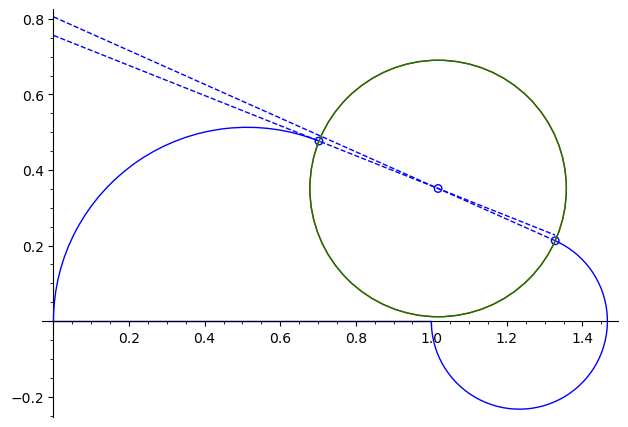

In [13]:
t(0.512919,find_root(dc(0.512919,r_R) == 0, 0.17, 0.3),false)

After exploring around $r_L \approx 0.51$ with the right corner turning down, it looks like
the minimum length of the fourth side is about $1.05$.  Exploring negative $r_L$ doesn't
look promising.  Now consider the right corner turning up.

In [14]:
l4u(x,r_R) = -y4(r_R) + (x-x4(r_R))/tan(1/r_R)
xcu(r_L,r_R) = solve(l3(x,r_L) == l4u(x,r_R), x)[0].rhs().simplify_full()
ycu(r_L,r_R) = l3(xcu(r_L,r_R),r_L).simplify_full()
dcu(r_L,r_R) = (xcu(r_L,r_R)-x3(r_L))^2 + (ycu(r_L,r_R)-y3(r_L))^2 - (xcu(r_L,r_R)-x4(r_R))^2 - (ycu(r_L,r_R)+y4(r_R))^2

An exact solution is still beyond the capabilities of the solver, but
more exploration finds the pseudo-square.

radius=(0.427652212859920, 0.427652212859920)
circumference=(2.68701810042429, 2.68701810042429)
theta_3=-0.758731601755120,theta_4=-3.09708031112461
1.00000000000000
1.68701810042429
1.00000000000000
1.68701810042429


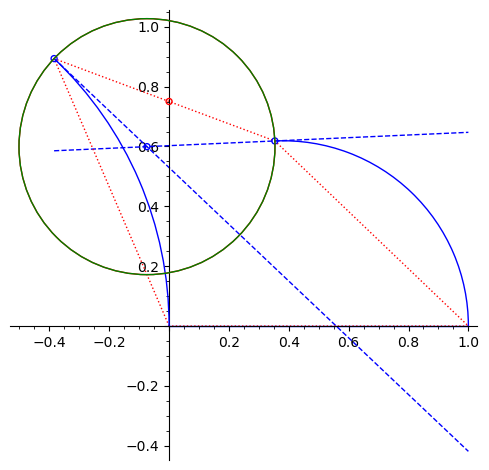

In [15]:
rl = -1.23142893560734
rr = find_root(dcu(rl,r_R) == 0, -1, -0.5)
y5 = y3(rl) + (-y4(rr) - y3(rl))/(x4(rr) - x3(rl))*(0-x3(rl))
t(rl,rr,true) + line([(0,0),(x3(rl),y3(rl)),(x4(rr),-y4(rr)),(1,0),(0,0)],linestyle='dotted',color='red') \
    + circle((0,y5),0.01,color='red')

Noting that $x_3 < 0$, and that the upper right corner is at $(x_4,-y_4)$,
the area of the red quadrilateral is

In [16]:
a_q = -x3(rl)*y3(rl)/2 + x3(rl)*(y3(rl)-y5)/2 \
    - y4(rr)*x4(rr) + (y5+y4(rr))*x4(rr)/2 \
    - y4(rr)*(1-x4(rr))/2
a_q

0.585938637613981

The radius of curvature of the last side is

In [17]:
r_last = sqrt((x3(rl) - xcu(rl,rr))^2 + (y3(rl) - ycu(rl,rr))^2)
r_last

0.427652212859920

The area of a circular segment is

In [18]:
a_seg(r,theta) = r^2/2*abs(theta-sin(theta))

So the area of the pseudo-square is

In [19]:
a_q - a_seg(rl,1/rl) + a_seg(rr,1/rr) + a_seg(r_last,1/r_last)

0.786585793630992

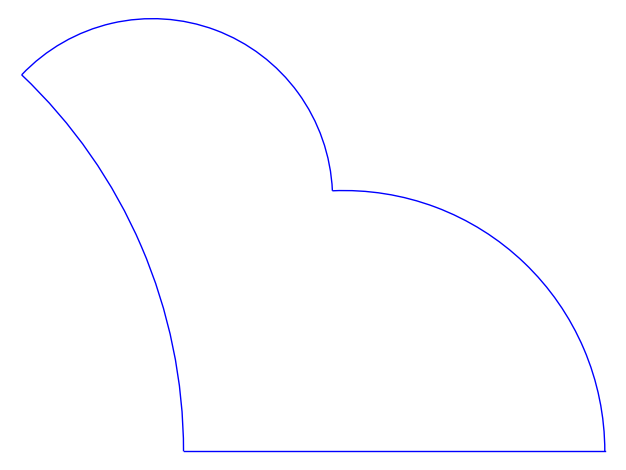

In [20]:
line([(0,0),(1,0)],axes=false) \
    + arc((rl,0),abs(rl),angle=0,sector=(0,abs(1/rl))) \
    + arc((1+rr,0),abs(rr),angle=0,sector=(0,abs(1/rr))) \
    + arc((xcu(rl,rr),ycu(rl,rr)),r_last,angle=atan2(-y4(rr)-ycu(rl,rr),x4(rr)-xcu(rl,rr)),sector=(0,abs(1/r_last)))

More extra credit solutions
---------------------------
There are multiple solutions to the extra credit.  Here are three.

In [21]:
rl = -1.23142893560734
rr = find_root(dcu(rl,r_R) == 0, -1, -0.5)
r_last = sqrt((x3(rl) - xcu(rl,rr))^2 + (y3(rl) - ycu(rl,rr))^2)
y5 = y3(rl) + (-y4(rr) - y3(rl))/(x4(rr) - x3(rl))*(0-x3(rl))
a_q = -x3(rl)*y3(rl)/2 + x3(rl)*(y3(rl)-y5)/2 - y4(rr)*x4(rr) + (y5+y4(rr))*x4(rr)/2 - y4(rr)*(1-x4(rr))/2
sol1 = line([(0,0),(1,0)],axes=false) \
    + arc((rl,0),abs(rl),angle=0,sector=(0,abs(1/rl))) \
    + arc((1+rr,0),abs(rr),angle=0,sector=(0,abs(1/rr))) \
    + arc((xcu(rl,rr),ycu(rl,rr)),r_last,angle=atan2(-y4(rr)-ycu(rl,rr),x4(rr)-xcu(rl,rr)),sector=(0,abs(1/r_last))) \
    + text(f"A≈{a_q - a_seg(rl,1/rl) + a_seg(rr,1/rr) + a_seg(r_last,1/r_last)}",(0.5,0.2),fontsize='x-small')

In [22]:
rl = 1.334038432598954
rr = find_root(dcu(rl,r_R) == 0, -2, -1)
r_last = sqrt((x3(rl) - xcu(rl,rr))^2 + (y3(rl) - ycu(rl,rr))^2)
a_q = x3(rl)*y3(rl)/2 + (x4(rr)-x3(rl))*(y3(rl) - y4(rr))/2 - y4(rr)*(1-x4(rr))/2
offset = 1.1
sol2 = line([(offset+0,0),(offset+1,0)],axes=false) \
    + arc((offset+rl,0),abs(rl),angle=0,sector=(pi-abs(1/rl),pi)) \
    + arc((offset+1+rr,0),abs(rr),angle=0,sector=(0,abs(1/rr))) \
    + arc((offset+xcu(rl,rr),ycu(rl,rr)),r_last,angle=atan2(-y4(rr)-ycu(rl,rr),x4(rr)-xcu(rl,rr)),sector=(0,abs(1/r_last))) \
    + text(f"A≈{a_q + a_seg(rl,1/rl) + a_seg(rr,1/rr) + a_seg(r_last,1/r_last)}",(offset+0.5,0.2),fontsize='x-small')

In [23]:
rl = 0.502852613737775
rr = find_root(dc(rl,r_R) == 0, 0.20, 0.231)
r_last = sqrt((x3(rl) - xc(rl,rr))^2 + (y3(rl) - yc(rl,rr))^2)
a_q = x3(rl)*y3(rl)/2 + (x4(rr)-x3(rl))*(y3(rl)+y4(rr))/2 - (x4(rr)-1)*y4(rr)/2
offset = 2.2
sol3 = line([(offset+0,0),(offset+1,0)],axes=false) \
    + arc((offset+rl,0),abs(rl),angle=0,sector=(pi-abs(1/rl),pi)) \
    + arc((offset+1+rr,0),abs(rr),angle=pi,sector=(0,abs(1/rr))) \
    + arc((offset+xc(rl,rr),yc(rl,rr)),r_last,angle=atan2(y4(rr)-yc(rl,rr),x4(rr)-xc(rl,rr)),sector=(0,abs(1/r_last))) \
    + text(f"A≈{a_q+a_seg(rl,1/rl)+a_seg(rr,1/rr)+a_seg(r_last,1/r_last)}",(offset+0.7,0.2),fontsize='x-small')

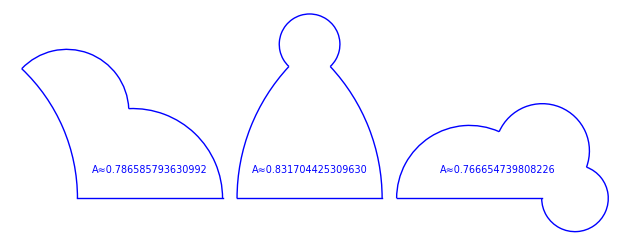

In [24]:
sol1+sol2+sol3

### Further thoughts
----------------
A much easier case is a pseudo-square with four curved sides, which has four arcs with radius of curvature
$1/\pi$, and its area is $4/\pi^2 + 2/\pi \approx 1.04$.

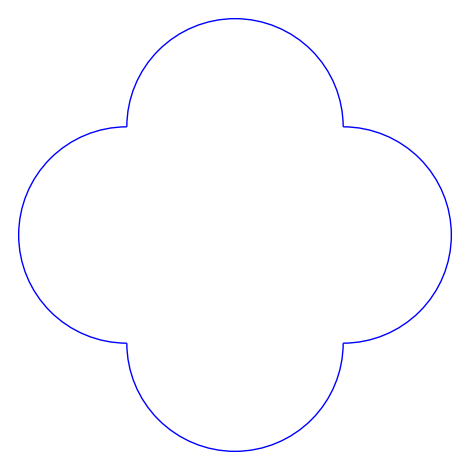

In [25]:
(arc((0,1/pi),1/pi,angle=-pi,sector=(pi,2*pi),axes=false)
 + arc((1/pi,0),1/pi,angle=pi/2,sector=(pi,2*pi))
 + arc((0,-1/pi),1/pi,angle=0,sector=(pi,2*pi))
 + arc((-1/pi,0),1/pi,angle=3*pi/2,sector=(pi,2*pi)))

More further thoughts
---------------------
In 3D, there are probably many more ways to make a pseudo-square with one straight side,
though its area would be harder to define.

Consider 4 points on the surface of a sphere, where the two "left" corners have the same longitude, the two
"right" corners have the same longitude, the two "top" corners have the same latitude, and the two "bottom"
corners have the same latitude.  Let the two "bottom" corners be closer to the equator than the two "top"
corners, so they will be joined by a straight edge going through the interior of the sphere.  The other
three edges are arcs along the surface of the sphere.

Let $R$ be the radius of the sphere and let the two bottom corners be on the equator.  The latitude
of the of two top corners is $\theta = 1/R$.  The difference in longitudes is
$\phi = 1/R\cos\theta = 1/R\cos(1/R)$.  The straight-line distance between the two points on the
equator is $2R\sin(\phi/2) = 2R\sin(1/2R\cos(1/R))$.

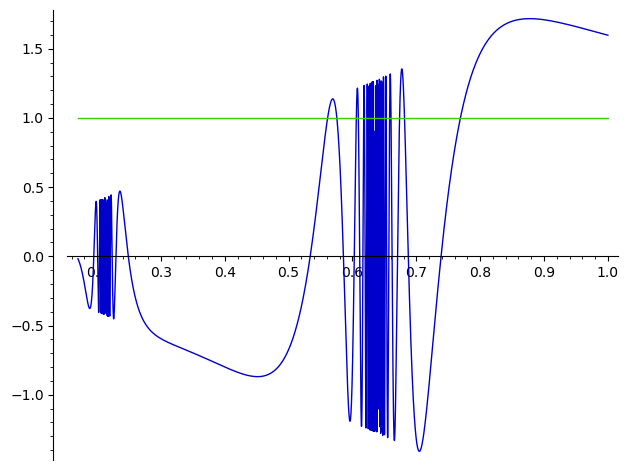

In [26]:
plot([2*x*sin(1/(2*x*cos(1/x))), 1], x, 0.17, 1)

In [27]:
solve(2*x*sin(1/(2*x*cos(1/x))) == 1, x)

[x == 1/2/sin(1/2/(x*cos(1/x)))]

In [28]:
find_root(2*x*sin(1/(2*x*cos(1/x))) == 1, 0.7, 0.8)

0.7690164971773072

That's just one solution out of multiple possible solutions.  As can be seen on the graph,
there are an infinite number of solutions near $R = 2/\pi$.

And given a pseudo-square with one straight side and 3 arcs on a sphere, any of the arcs
could be rotated, maintaining the 90° corners at each end, for 7 more solutions.

And there are probably many more when the 3 arcs don't all have the same radius of
curvature.